In [1]:
#Necessary Imports

import pandas as pd
from scipy.stats import zscore
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [40]:
# Read the dataset and save in a data frame

df = pd.read_csv('US_Accidents_March23.csv')
print("The shape of data is:",(df.shape))
display(df.head(3))

The shape of data is: (7728394, 46)


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day


In [41]:
#Data Cleaning

#Removing rows with na values
df = df.dropna()

# Dropping unnecessary coloumns
df_2 = df.drop(['Source', 'Start_Lat','Start_Lng', 'End_Lat', 'End_Lng', 'Description', 
                  'Street', 'County','Country', 'Zipcode', 'Airport_Code', 'Weather_Timestamp', 
                  'Wind_Chill(F)', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 
                  'Wind_Direction', 'Precipitation(in)', 'Nautical_Twilight', 'Civil_Twilight', 
                  'Astronomical_Twilight'], axis=1)

# Encoding
dat = df_2['Timezone'].unique()
nums = []
dict_dat = {}
for i in range(0,len(dat)):
    nums.append(i+1)
uni = dict(zip(list(dat),nums))

df_2['Timezone'].replace(uni, inplace=True)

##############################################
dat = df_2['Junction'].unique()
nums = []
dict_dat = {}
for i in range(0,len(dat)):
    nums.append(i)
uni = dict(zip(list(dat),nums))

df_2['Junction'].replace(uni, inplace=True)

#############################################
dat = df_2['No_Exit'].unique()
nums = []
dict_dat = {}
for i in range(0,len(dat)):
    nums.append(i)
uni = dict(zip(list(dat),nums))
# print(dict_dat)
df_2['No_Exit'].replace(uni, inplace=True)

##############################################
dat = df_2['Railway'].unique()
nums = []
dict_dat = {}
for i in range(0,len(dat)):
    nums.append(i)
uni = dict(zip(list(dat),nums))

df_2['Railway'].replace(uni, inplace=True)

#############################################
dat = df_2['Roundabout'].unique()
nums = []
dict_dat = {}
for i in range(0,len(dat)):
    nums.append(i)
uni = dict(zip(list(dat),nums))

df_2['Roundabout'].replace(uni, inplace=True)

#################################################
dat = df_2['Station'].unique()
nums = []
dict_dat = {}
for i in range(0,len(dat)):
    nums.append(i)
uni = dict(zip(list(dat),nums))

df_2['Station'].replace(uni, inplace=True)

############################################
dat = df_2['Stop'].unique()
nums = []
dict_dat = {}
for i in range(0,len(dat)):
    nums.append(i)
uni = dict(zip(list(dat),nums))

df_2['Stop'].replace(uni, inplace=True)

###########################################
dat = df_2['Traffic_Calming'].unique()
nums = []
dict_dat = {}
for i in range(0,len(dat)):
    nums.append(i)
uni = dict(zip(list(dat),nums))

df_2['Traffic_Calming'].replace(uni, inplace=True)

###################################################
dat = df_2['Traffic_Signal'].unique()
nums = []
dict_dat = {}
for i in range(0,len(dat)):
    nums.append(i)
uni = dict(zip(list(dat),nums))

df_2['Traffic_Signal'].replace(uni, inplace=True)

######################################################
dat = df_2['Turning_Loop'].unique()
nums = []
dict_dat = {}
for i in range(0,len(dat)):
    nums.append(i)
uni = dict(zip(list(dat),nums))

df_2['Turning_Loop'].replace(uni, inplace=True)

#################################################
dat = df_2['Sunrise_Sunset'].unique()
nums = []
dict_dat = {}
for i in range(0,len(dat)):
    nums.append(i+1)
uni = dict(zip(list(dat),nums))

df_2['Sunrise_Sunset'].replace(uni, inplace=True)

#################################################
dat = df_2['Amenity'].unique()
nums = []
dict_dat = {}
for i in range(0,len(dat)):
    nums.append(i+1)
uni = dict(zip(list(dat),nums))

df_2['Amenity'].replace(uni, inplace=True)

#################################################
dat = df_2['Bump'].unique()
nums = []
dict_dat = {}
for i in range(0,len(dat)):
    nums.append(i+1)
uni = dict(zip(list(dat),nums))

df_2['Bump'].replace(uni, inplace=True)


#################################################
dat = df_2['Crossing'].unique()
nums = []
dict_dat = {}
for i in range(0,len(dat)):
    nums.append(i+1)
uni = dict(zip(list(dat),nums))

df_2['Crossing'].replace(uni, inplace=True)
#################################################
dat = df_2['Give_Way'].unique()
nums = []
dict_dat = {}
for i in range(0,len(dat)):
    nums.append(i+1)
uni = dict(zip(list(dat),nums))

df_2['Give_Way'].replace(uni, inplace=True)

# Clubbing similar features
rain = ['Light Rain','Rain','Light Freezing Drizzle','Light Drizzle','Heavy Rain','Light Freezing Rain','Drizzle','Light Rain Showers',
        'Light Thunderstorms and Rain','Thunderstorms and Rain','Rain Showers','Heavy Drizzle','Showers in the Vicinity',
        'Thunderstorm','Light Rain Shower','Light Rain with Thunder','T-Storm','Heavy Rain / Windy',
        'Heavy Thunderstorms and Rain','Thunder','Heavy T-Storm','Rain / Windy','Heavy Freezing Rain',
        'Heavy Rain Showers','Rain Shower','Freezing Drizzle','Light Freezing Rain / Windy','Freezing Rain',
        'Heavy Freezing Rain / Windy','Light Rain Shower / Windy','Freezing Rain / Windy','Light Thunderstorm',
        'Heavy Freezing Drizzle','Rain Shower / Windy','Heavy Rain Shower / Windy','Heavy Rain Shower','N/A Precipitation']

cloudy = ['Overcast','Mostly Cloudy','Scattered Clouds','Partly Cloudy','Cloudy','Funnel Cloud','Cloudy / Windy']

snow = ['Light Snow','Snow','Blowing Snow','Light Thunderstorms and Snow','Heavy Snow','Low Drifting Snow',
        'Snow Grains','Snow Showers','Heavy Thunderstorms and Snow','Light Snow / Windy','Light Snow with Thunder',
        'Snow and Thunder','Light Snow Shower','Snow / Windy','Snow and Sleet','Heavy Snow / Windy',
        'Blowing Snow / Windy','Snow and Thunder / Windy','Duststorm','Light Snow Shower / Windy','Light Snow Grains',
        'Heavy Snow with Thunder','Light Snow Showers','Heavy Blowing Snow','Light Blowing Snow','Thunderstorms and Snow',
        'Drifting Snow / Windy','Blowing Snow Nearby','Drifting Snow']

fog = ['Haze','Fog','Shallow Fog','Mist','Smoke','Patches of Fog','Light Freezing Fog',
       'Light Haze','Widespread Dust','Light Fog','Drizzle and Fog','Smoke / Windy','Haze / Windy','Wintry Mix',
       'Wintry Mix / Windy','Fog / Windy','Thunder / Wintry Mix','Mist / Windy','Partial Fog','Thunder / Wintry Mix / Windy',
       'Patches of Fog / Windy','Partial Fog / Windy','Heavy Smoke','Shallow Fog / Windy']

clear = ['Clear','Fair']

windy = ['Blowing Sand','Blowing Dust / Windy','Fair / Windy','Mostly Cloudy / Windy','Light Rain / Windy',
         'Partly Cloudy / Windy','Thunder in the Vicinity','Heavy T-Storm / Windy','Squalls',
        'Sand','Thunder / Windy','T-Storm / Windy','Blowing Dust','Tornado','Light Drizzle / Windy','Widespread Dust / Windy',
         'Light Snow and Sleet / Windy','Snow and Sleet / Windy','Sleet / Windy','Squalls / Windy',
         'Light Sleet / Windy','Sand / Dust Whirlwinds','Drizzle / Windy','Sand / Dust Whirls Nearby','Heavy Sleet',
         'Rain and Sleet','Sand / Dust Whirlwinds / Windy','Dust Whirls','Sleet and Thunder','Heavy Sleet and Thunder',
         'Heavy Sleet / Windy','Sand / Windy']

disaster = ['Volcanic Ash']

hail = ['Hail','Light Ice Pellets','Ice Pellets','Heavy Ice Pellets','Small Hail','Sleet','Light Snow and Sleet',
       'Light Sleet','Thunder and Hail','Light Hail','Heavy Thunderstorms with Small Hail','Thunder and Hail / Windy']


simplified_list = [rain,cloudy,snow,fog,clear,windy,disaster,hail]
counter = 1
for i in simplified_list:
    dat = i
    nums = []
    dict_dat = {}
    for j in range(0,len(dat)):
        nums.append(counter)
    counter += 1
    uni = dict(zip(list(dat),nums))
    df_2['Weather_Condition'].replace(uni, inplace=True)

# Changing date and time formats
df_2['Start_Time'] = df_2['Start_Time'].str.split(' ', expand = True)[0]
df_2['End_Time'] = df_2['End_Time'].str.split(' ', expand = True)[1]
df_2['End_Time'] = df_2['End_Time'].str.split('.', expand = True)[0]
df_2.rename(columns={'Start_Time': 'Date'}, inplace=True)
df_2.rename(columns={'End_Time': 'Time'}, inplace=True)

# Removing duplicates
df_2 = df_2.drop_duplicates()


df_2['Date'] = pd.to_datetime(df_2['Date'])
df_2['Date'] = df_2['Date'].dt.strftime('%m-%d-%Y')





In [42]:
#Saving the cleaned dataset
df_2.to_csv('df_2.csv', index=False)


In [5]:
# Transforming the dataset to get predictions
df_2 = df_2.drop(['ID', 'Distance(mi)', 'City', 'Timezone', 'Visibility(mi)', 
                  'Wind_Speed(mph)', 'Junction','No_Exit', 'Railway', 'Roundabout', 'Station', 
                  'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 
                  'Sunrise_Sunset', 'Time', 'Time', 'Weather_Condition', 'Amenity', 'Bump', 
                  'Crossing', 'Give_Way'], axis=1)

In [8]:
# Getting the number of accidents per Severity per State per Date
final_df = df_2.groupby(['Severity', 'State', 'Date']).size().reset_index(name='Number of Accidents')

In [9]:
# Encoding the states

label_state = LabelEncoder()
final_df['State'] = label_state.fit_transform(final_df['State'])
final_df['State'].unique

<bound method Series.unique of 0         0
1         0
2         0
3         0
4         0
         ..
92922    48
92923    48
92924    48
92925    48
92926    48
Name: State, Length: 92927, dtype: int64>

In [29]:
# Splitting the date

final_df['Date'] = pd.to_datetime(final_df['Date'])
final_df['Year'] = final_df['Date'].dt.year
final_df['Month'] = final_df['Date'].dt.month
final_df['Day'] = final_df['Date'].dt.day

In [30]:
final_df

,Severity,State,Date,Number of Accidents,Year,Month,Day
0,1,0,2020-03-19,4,2020,3,19
1,1,0,2020-03-22,3,2020,3,22
2,1,0,2020-03-23,4,2020,3,23
3,1,0,2020-03-24,3,2020,3,24
4,1,0,2020-03-25,3,2020,3,25
...,...,...,...,...,...,...,...
92922,4,48,2016-12-27,1,2016,12,27
92923,4,48,2022-12-27,2,2022,12,27
92924,4,48,2021-12-28,1,2021,12,28
92925,4,48,2022-12-28,1,2022,12,28


In [31]:
# Saving the dataset that is being used for prediction

final_df.to_csv('final_df.csv', index=False)


In [32]:
final_df.columns

Index(['Severity', 'State', 'Date', 'Number of Accidents', 'Year', 'Month',
       'Day'],
      dtype='object')

In [33]:
# Performing random forest regressor for prediction



# Prepare features and target variable
X = final_df[['Severity', 'State', 'Year', 'Month','Day']]
y = final_df['Number of Accidents']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error (Random Forest): {mse_rf}')


Mean Squared Error (Random Forest): 1736.067680727429


In [34]:
from sklearn.metrics import r2_score

# Evaluate the model using R-squared
r_squared_rf = r2_score(y_test, y_pred_rf)
print(f'R-squared (Random Forest): {r_squared_rf}')

R-squared (Random Forest): 0.8828704260519764


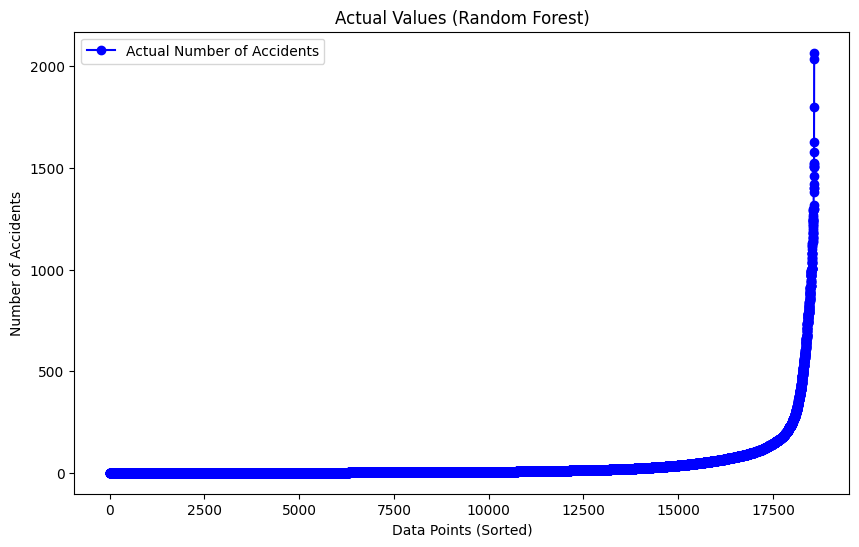

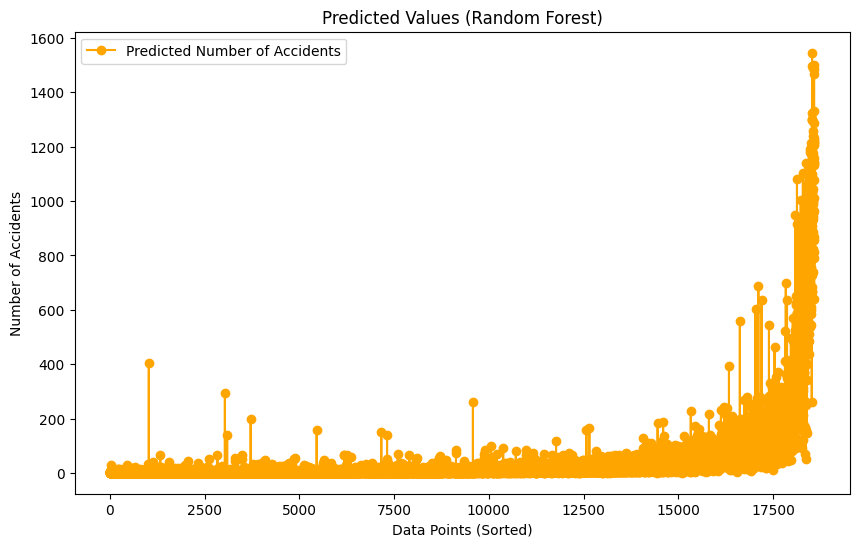

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Sort the values for better visualization
sorted_indices = np.argsort(y_test)
y_test_sorted = np.array(y_test)[sorted_indices]
y_pred_rf_sorted = y_pred_rf[sorted_indices]

# Create a line graph for actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test_sorted, label='Actual Number of Accidents', marker='o', color='blue')
plt.title('Actual Values (Random Forest)')
plt.xlabel('Data Points (Sorted)')
plt.ylabel('Number of Accidents')
plt.legend()
plt.show()

# Create a line graph for predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_pred_rf_sorted, label='Predicted Number of Accidents', marker='o', color='orange')
plt.title('Predicted Values (Random Forest)')
plt.xlabel('Data Points (Sorted)')
plt.ylabel('Number of Accidents')
plt.legend()
plt.show()


In [37]:
new_instance = pd.DataFrame({'Severity': [2],
                             'State': [0],
                             'Year': [2024],
                             'Month': [10],
                             'Day':[13]})

new_instance =new_instance.astype(float)
print(new_instance)
# Use the trained Random Forest Regressor model to predict the number of accidents
predicted_accidents = rf_model.predict(new_instance)

print(f'Predicted Number of Accidents: {predicted_accidents}')

   Severity  State    Year  Month   Day
0       2.0    0.0  2024.0   10.0  13.0
Predicted Number of Accidents: [44.18]


In [38]:
# Storing in a pickle file
import pickle
data = {"model" : rf_model,
        "state" :label_state }

with open("saved_steps_rf.pkl",'wb') as file:
        pickle.dump(data,file)

In [39]:
with open("saved_steps_rf.pkl",'rb') as file:
    data = pickle.load(file)
regressor_loaded = data['model']
state_loaded = data['state']


predicted_accidents = regressor_loaded.predict(new_instance)

print(f'Predicted Number of Accidents: {predicted_accidents}')

Predicted Number of Accidents: [44.18]
